In [121]:
import pandas as pd
import os 
import json
import re
from openai import OpenAI
from adjustText import adjust_text
import networkx as nx
import numpy as np


In [122]:
df = pd.read_csv("citation_network.csv")
df

file  \
0    ../full_texts/10.1053/j.semnuclmed.2022.10.007...   
1    ../full_texts/10.1016/j.dcan.2023.02.017/10.10...   
2    ../full_texts/10.1016/j.micpro.2023.104794/10....   
3    ../full_texts/10.1016/j.micpro.2023.104794/10....   
4    ../full_texts/10.1016/j.apmt.2018.11.003/10.10...   
..                                                 ...   
842  ../full_texts/10.1016/j.ifacol.2022.04.220/10....   
843  ../full_texts/10.1016/j.ifacol.2022.04.220/10....   
844  ../full_texts/10.1016/j.engappai.2023.106813/1...   
845  ../full_texts/10.1016/j.energy.2023.127317/10....   
846  ../full_texts/10.3390/joitmc6030079/10.3390_jo...   

                                                  defs  \
0    digital twin is a digital model of the actual ...   
1    digital twin is a simulation model of the phys...   
2    Digital Twins is a transformation of technolog...   
3    Digital Twins is a collaboration of various in...   
4    digital twin is a virtual replica of the hardw...   
..                                                 ...   
842  Digital Twin is defined as a set of adaptive m...   
843  Digital Twin is a Digital Twin devoted to the ...   
844  digital twin is a virtual replica of a physica...   
845  defined digital twin as a representation of a ...   
846  digital twin is a virtual model of a physical ...   

                          eid  \
0    1-s2.0-S0001299822000940   
1    1-s2.0-S2352864823000524   
2    1-s2.0-S0141933123000406   
3    1-s2.0-S0141933123000406   
4    1-s2.0-S2352940718304931   
..                        ...   
842  1-s2.0-S240589632200221X   
843  1-s2.0-S240589632200221X   
844  1-s2.0-S0952197623009971   
845  1-s2.0-S0360544223007119   
846  1-s2.0-S2199853122005728   

                                        dc:description  \
0    Developments in artificial intelligence, parti...   
1    The Metaverse depicts a parallel digitalized w...   
2    The Digital twins will duplicate the actual ob...   
3    The Digital twins will duplicate the actual ob...   
4    The customized production of complex component...   
..                                                 ...   
842  The development of future Industrial Cyber-Phy...   
843  The development of future Industrial Cyber-Phy...   
844  This narrative review paper explores the diver...   
845  The gradual energy consumption increments and ...   
846  Innovation has been and continues to be an imp...   

                                              dc:title  \
0    Radiation Dosimetry, Artificial Intelligence a...   
1    A new technology perspective of the Metaverse:...   
2    The novel emergency hospital services for pati...   
3    The novel emergency hospital services for pati...   
4    A digital twin for rapid qualification of 3D p...   
..                                                 ...   
842  Design and Use of Human Operator Digital Twins...   
843  Design and Use of Human Operator Digital Twins...   
844  The role of artificial intelligence and digita...   
845  Digital twin for natural gas infrastructure op...   
846  Towards a Longitudinal Outlook on Industry Tra...   

                                    def_with_citations  \
0    accurate digital twins for radiation dosimetry...   
1    rt cities and manufacturing, where the smart c...   
2    tment and Health Minister & personal people [3...   
3    [64]. 5.2 Digital twins technology in health c...   
4    3 Digital twin: a new concept in metal printin...   
..                                                 ...   
842  Digital Twin is defined as a set of adaptive m...   
843  lo et al., 2020). From our point of view, a hu...   
844  of the most significant ones. 4.1 Digital twin...   
845  ld data. In recent research, Semerano et al. [...   
846  dware costs is the notion of a “digital twins....   

                                        all_references  \
0     1 g. currie intelligent imaging: artificial i...   
1     [1] h. ning x. ye m.a. bouras d. wei m. danes.

In [123]:
df2 = pd.read_csv("citation_network_formatted_2.csv")
df2

file  \
0    ../full_texts/10.1053/j.semnuclmed.2022.10.007...   
1    ../full_texts/10.1016/j.dcan.2023.02.017/10.10...   
2    ../full_texts/10.1016/j.micpro.2023.104794/10....   
3    ../full_texts/10.1016/j.micpro.2023.104794/10....   
4    ../full_texts/10.1016/j.apmt.2018.11.003/10.10...   
..                                                 ...   
842  ../full_texts/10.1016/j.ifacol.2022.04.220/10....   
843  ../full_texts/10.1016/j.ifacol.2022.04.220/10....   
844  ../full_texts/10.1016/j.engappai.2023.106813/1...   
845  ../full_texts/10.1016/j.energy.2023.127317/10....   
846  ../full_texts/10.3390/joitmc6030079/10.3390_jo...   

                                                  defs  \
0    digital twin is a digital model of the actual ...   
1    digital twin is a simulation model of the phys...   
2    Digital Twins is a transformation of technolog...   
3    Digital Twins is a collaboration of various in...   
4    digital twin is a virtual replica of the hardw...   
..                                                 ...   
842  Digital Twin is defined as a set of adaptive m...   
843  Digital Twin is a Digital Twin devoted to the ...   
844  digital twin is a virtual replica of a physica...   
845  defined digital twin as a representation of a ...   
846  digital twin is a virtual model of a physical ...   

                          eid  \
0    1-s2.0-S0001299822000940   
1    1-s2.0-S2352864823000524   
2    1-s2.0-S0141933123000406   
3    1-s2.0-S0141933123000406   
4    1-s2.0-S2352940718304931   
..                        ...   
842  1-s2.0-S240589632200221X   
843  1-s2.0-S240589632200221X   
844  1-s2.0-S0952197623009971   
845  1-s2.0-S0360544223007119   
846  1-s2.0-S2199853122005728   

                                        dc:description  \
0    Developments in artificial intelligence, parti...   
1    The Metaverse depicts a parallel digitalized w...   
2    The Digital twins will duplicate the actual ob...   
3    The Digital twins will duplicate the actual ob...   
4    The customized production of complex component...   
..                                                 ...   
842  The development of future Industrial Cyber-Phy...   
843  The development of future Industrial Cyber-Phy...   
844  This narrative review paper explores the diver...   
845  The gradual energy consumption increments and ...   
846  Innovation has been and continues to be an imp...   

                                              dc:title  \
0    Radiation Dosimetry, Artificial Intelligence a...   
1    A new technology perspective of the Metaverse:...   
2    The novel emergency hospital services for pati...   
3    The novel emergency hospital services for pati...   
4    A digital twin for rapid qualification of 3D p...   
..                                                 ...   
842  Design and Use of Human Operator Digital Twins...   
843  Design and Use of Human Operator Digital Twins...   
844  The role of artificial intelligence and digita...   
845  Digital twin for natural gas infrastructure op...   
846  Towards a Longitudinal Outlook on Industry Tra...   

                                    def_with_citations  \
0    accurate digital twins for radiation dosimetry...   
1    rt cities and manufacturing, where the smart c...   
2    tment and Health Minister & personal people [3...   
3    [64]. 5.2 Digital twins technology in health c...   
4    3 Digital twin: a new concept in metal printin...   
..                                                 ...   
842  Digital Twin is defined as a set of adaptive m...   
843  lo et al., 2020). From our point of view, a hu...   
844  of the most significant ones. 4.1 Digital twin...   
845  ld data. In recent research, Semerano et al. [...   
846  dware costs is the notion of a “digital twins....   

                                        all_references  \
0     1 g. currie intelligent imaging: artificial i...   
1     [1] h. ning x. ye m.a. bouras d. wei m. danes.

In [124]:
df = df[df["citation_network"]!="error"].reset_index(drop=True)
df2 = df2[df2["citation_network"]!="error"].reset_index(drop=True)

In [125]:
df2

file  \
0    ../full_texts/10.1053/j.semnuclmed.2022.10.007...   
1    ../full_texts/10.1016/j.dcan.2023.02.017/10.10...   
2    ../full_texts/10.1016/j.micpro.2023.104794/10....   
3    ../full_texts/10.1016/j.micpro.2023.104794/10....   
4    ../full_texts/10.1016/j.apmt.2018.11.003/10.10...   
..                                                 ...   
734  ../full_texts/10.1016/j.ifacol.2022.04.220/10....   
735  ../full_texts/10.1016/j.ifacol.2022.04.220/10....   
736  ../full_texts/10.1016/j.ifacol.2022.04.220/10....   
737  ../full_texts/10.1016/j.energy.2023.127317/10....   
738  ../full_texts/10.3390/joitmc6030079/10.3390_jo...   

                                                  defs  \
0    digital twin is a digital model of the actual ...   
1    digital twin is a simulation model of the phys...   
2    Digital Twins is a transformation of technolog...   
3    Digital Twins is a collaboration of various in...   
4    digital twin is a virtual replica of the hardw...   
..                                                 ...   
734  Digital Twin is defined as a set of adaptive m...   
735  Digital Twin is defined as a set of adaptive m...   
736  Digital Twin is a Digital Twin devoted to the ...   
737  defined digital twin as a representation of a ...   
738  digital twin is a virtual model of a physical ...   

                          eid  \
0    1-s2.0-S0001299822000940   
1    1-s2.0-S2352864823000524   
2    1-s2.0-S0141933123000406   
3    1-s2.0-S0141933123000406   
4    1-s2.0-S2352940718304931   
..                        ...   
734  1-s2.0-S240589632200221X   
735  1-s2.0-S240589632200221X   
736  1-s2.0-S240589632200221X   
737  1-s2.0-S0360544223007119   
738  1-s2.0-S2199853122005728   

                                        dc:description  \
0    Developments in artificial intelligence, parti...   
1    The Metaverse depicts a parallel digitalized w...   
2    The Digital twins will duplicate the actual ob...   
3    The Digital twins will duplicate the actual ob...   
4    The customized production of complex component...   
..                                                 ...   
734  The development of future Industrial Cyber-Phy...   
735  The development of future Industrial Cyber-Phy...   
736  The development of future Industrial Cyber-Phy...   
737  The gradual energy consumption increments and ...   
738  Innovation has been and continues to be an imp...   

                                              dc:title  \
0    Radiation Dosimetry, Artificial Intelligence a...   
1    A new technology perspective of the Metaverse:...   
2    The novel emergency hospital services for pati...   
3    The novel emergency hospital services for pati...   
4    A digital twin for rapid qualification of 3D p...   
..                                                 ...   
734  Design and Use of Human Operator Digital Twins...   
735  Design and Use of Human Operator Digital Twins...   
736  Design and Use of Human Operator Digital Twins...   
737  Digital twin for natural gas infrastructure op...   
738  Towards a Longitudinal Outlook on Industry Tra...   

                                    def_with_citations  \
0    accurate digital twins for radiation dosimetry...   
1    rt cities and manufacturing, where the smart c...   
2    tment and Health Minister & personal people [3...   
3    [64]. 5.2 Digital twins technology in health c...   
4    3 Digital twin: a new concept in metal printin...   
..                                                 ...   
734  Digital Twin is defined as a set of adaptive m...   
735  Digital Twin is defined as a set of adaptive m...   
736  lo et al., 2020). From our point of view, a hu...   
737  ld data. In recent research, Semerano et al. [...   
738  dware costs is the notion of a “digital twins....   

                                        all_references  \
0     1 g. currie intelligent imaging: artificial i...   
1     [1] h. ning x. ye m.a. bouras d. wei m. danes.

In [129]:
all_things = list(df2["authors"]) + list(df2["citation_formatted_shortened"])
len(all_things)

1478

In [130]:
cit_df = pd.DataFrame({"cit" : all_things})

In [131]:
cit_df["cit"].value_counts()

cit
grieves_2017      58
grieves_2014      45
grieves_2016      17
rosen_2015        15
tao_2018          14
                  ..
ritzinger_2022     1
brunner_2021       1
knebel_2023        1
wu_2023            1
porter_2015        1
Name: count, Length: 833, dtype: int64

In [132]:
cit_df["cit"] = cit_df["cit"].apply(lambda x: f"{x.split('_')[0]}_{x.split('_')[-1]}")


In [133]:
cit_df

cit
0        currie_2023
1           shi_2023
2       aluvalu_2023
3       aluvalu_2023
4     mukherjee_2019
...              ...
1473     angulo_2019
1474     gibert_2021
1475         de_2021
1476   semeraro_2023
1477     porter_2015

[1478 rows x 1 columns]

In [134]:
unique_cit_values = cit_df['cit'].nunique()
unique_cit_values


832

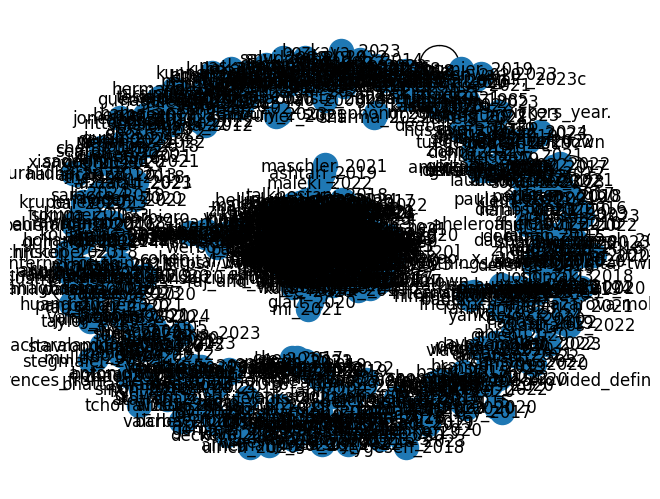

In [136]:
from fuzzywuzzy import fuzz
# I wnat to create a network graph that links the eid from the df dataframe with the citations_refined_2. 
# The problem is that some of the citations_refined_2 items are the same with a slight difference in one or two letters, how can we tell that they are the same ? 

# Create a network graph
G = nx.from_pandas_edgelist(df2, 'authors', 'citation_formatted_shortened')

# Fuzzy matching
threshold = 90  # set a threshold for the similarity
for node1 in G.nodes():
    for node2 in G.nodes():
        if node1 != node2:
            # calculate the similarity
            similarity = fuzz.ratio(node1, node2)
            if similarity > threshold:
                # if the similarity is above the threshold, merge the nodes
                G = nx.contracted_nodes(G, node1, node2)

# Draw the graph
nx.draw(G, with_labels=True)


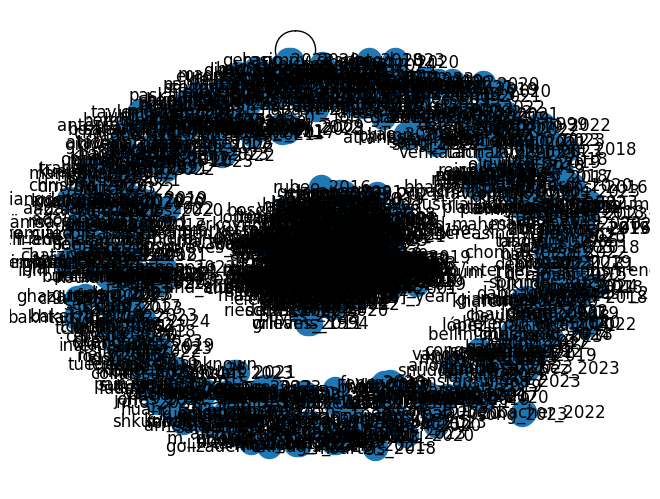

In [137]:
# Create a network graph using 'authors' and 'citations_refined_2'
G = nx.from_pandas_edgelist(df2, 'authors', 'citation_formatted_shortened')

# Fuzzy matching
threshold = 95  # set a threshold for the similarity
for node1 in G.nodes():
    for node2 in G.nodes():
        if node1 != node2:
            # calculate the similarity
            similarity = fuzz.ratio(str(node1), str(node2))
            if similarity > threshold:
                # if the similarity is above the threshold, merge the nodes
                G = nx.contracted_nodes(G, node1, node2)

# Draw the graph
nx.draw(G, with_labels=True)


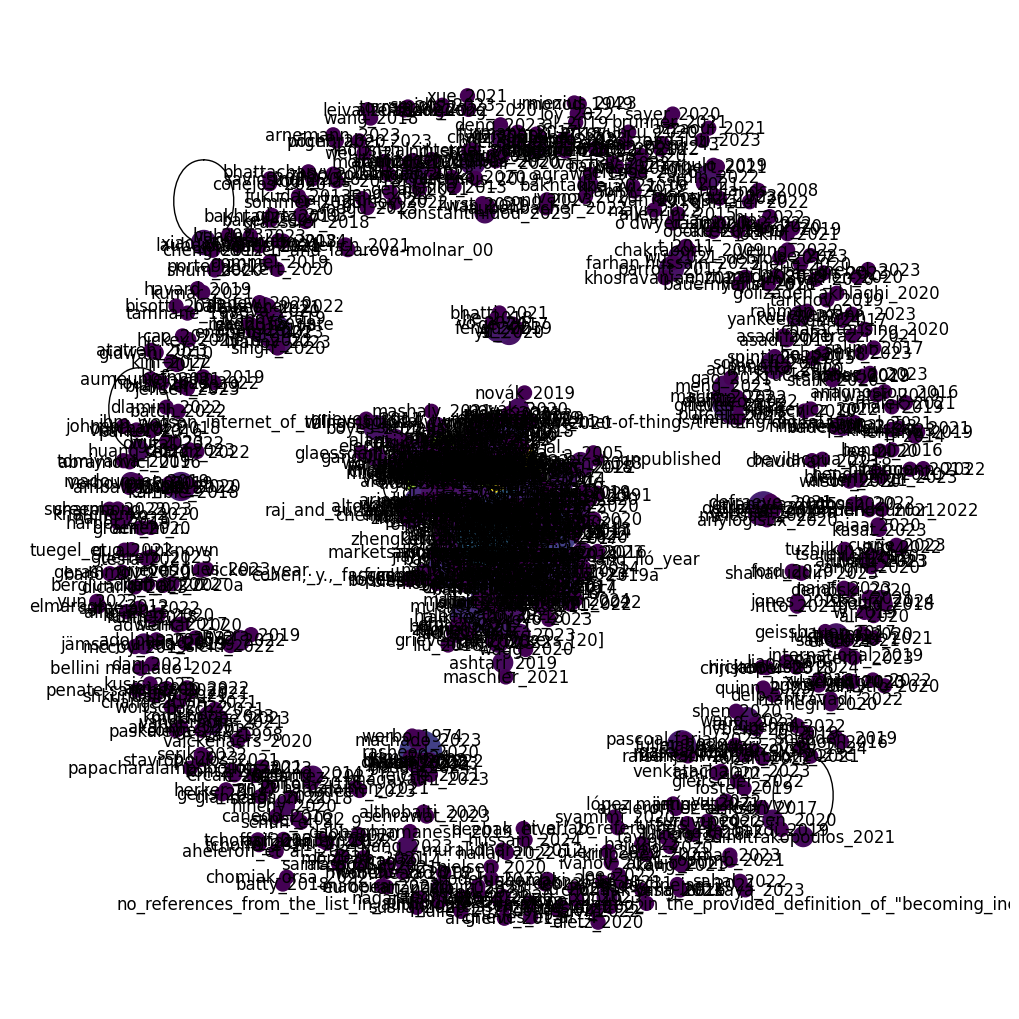

In [138]:
# Calculate degree of each node
degree = dict(G.degree())


# Sort nodes by degree and pick top 50
top_50_nodes = sorted(degree, key=degree.get, reverse=True)[:]

# Create subgraph with top 50 nodes
H = G.subgraph(top_50_nodes)

# Calculate degree for subgraph H
degree_H = dict(H.degree())

# Draw the graph
plt.figure(figsize=(10,10))
nx.draw(H, 
    with_labels=True, 
    node_color=list(degree_H.values()), 
    node_size=[v * 100 for v in degree_H.values()], 
    cmap=plt.cm.viridis)
plt.show()


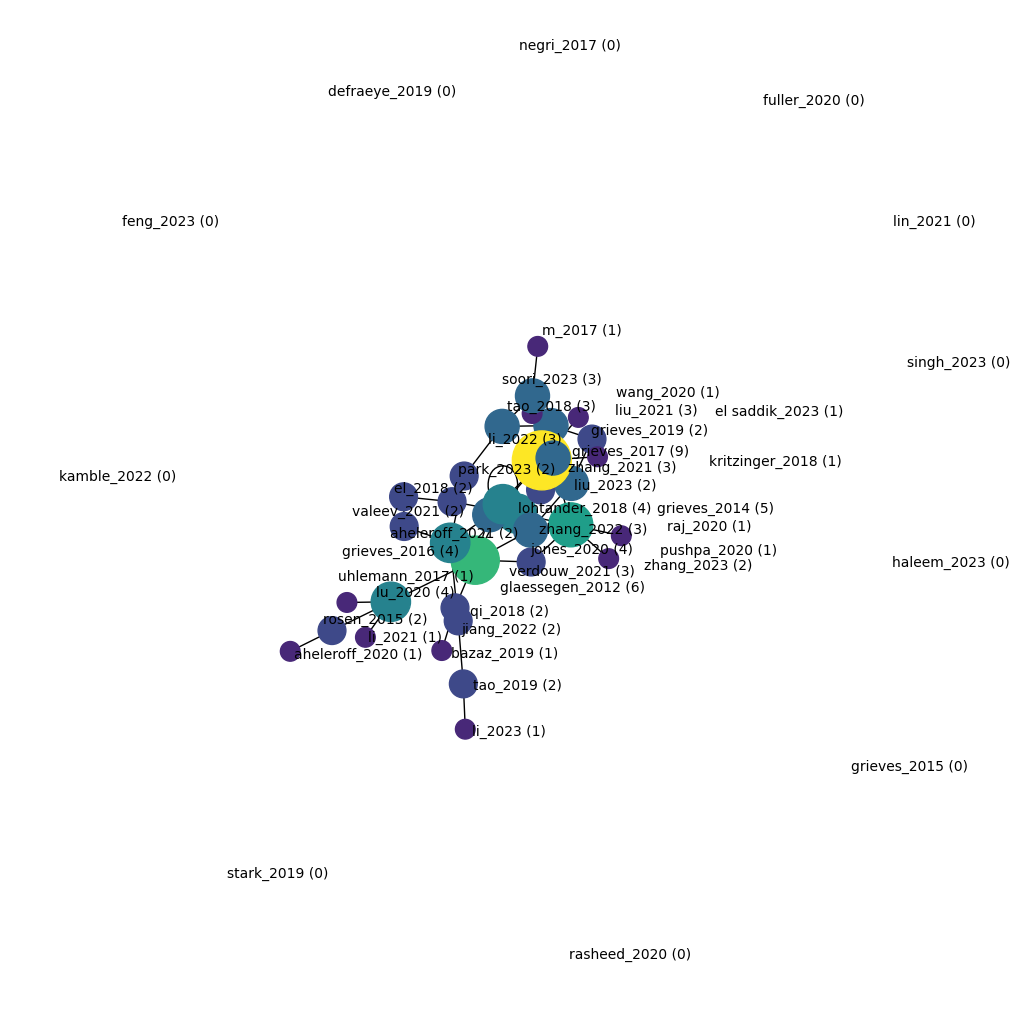

In [139]:
# Calculate degree of each node
degree = dict(G.degree())

# Filter nodes with degree > 0
filtered_nodes = [node for node, deg in degree.items() if deg > 3]

# Create subgraph with filtered nodes
H = G.subgraph(filtered_nodes)

# Calculate degree for subgraph H
degree_H = dict(H.degree())

plt.figure(figsize=(10,10))

# Draw the graph
pos = nx.spring_layout(H)  # positions for all nodes
smallest_degree = np.min(list(degree_H.values()))* 200
nx.draw(H, pos, 
    with_labels=False, 
    node_color=list(degree_H.values()), 
    node_size=[v * 200 - smallest_degree for v in degree_H.values()], 
    cmap=plt.cm.viridis)

# Create a list to store the text objects
texts = []

for node, (x, y) in pos.items():
    text = plt.text(x, y, 
                    '{} ({})'.format(node, degree_H[node]), 
                    fontsize=10)
    texts.append(text)

# Adjust text positions
adjust_text(texts)

plt.show()


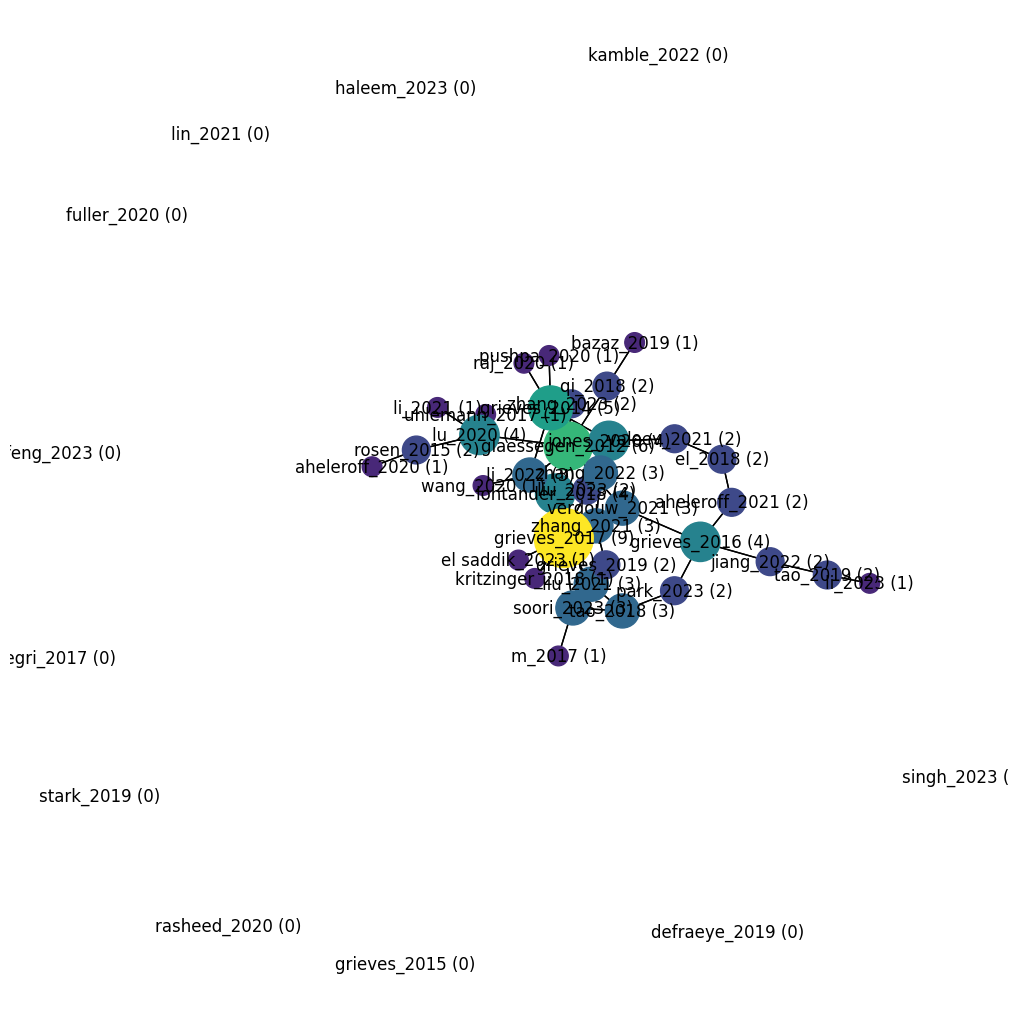

In [140]:
plt.figure(figsize=(10,10))

# Draw the graph
pos = nx.spring_layout(H)  # positions for all nodes
smallest_degree = np.min(list(degree_H.values()))* 200
nx.draw(H, pos, 
    with_labels=False, 
    node_color=list(degree_H.values()), 
    node_size=[v * 200 - smallest_degree for v in degree_H.values()], 
    cmap=plt.cm.viridis)

# Draw edges
nx.draw_networkx_edges(H, pos)

# Create a dictionary of labels
labels = {node: '{} ({})'.format(node, degree_H[node]) for node in H.nodes()}

# Draw labels
nx.draw_networkx_labels(H, pos, labels=labels)

plt.show()


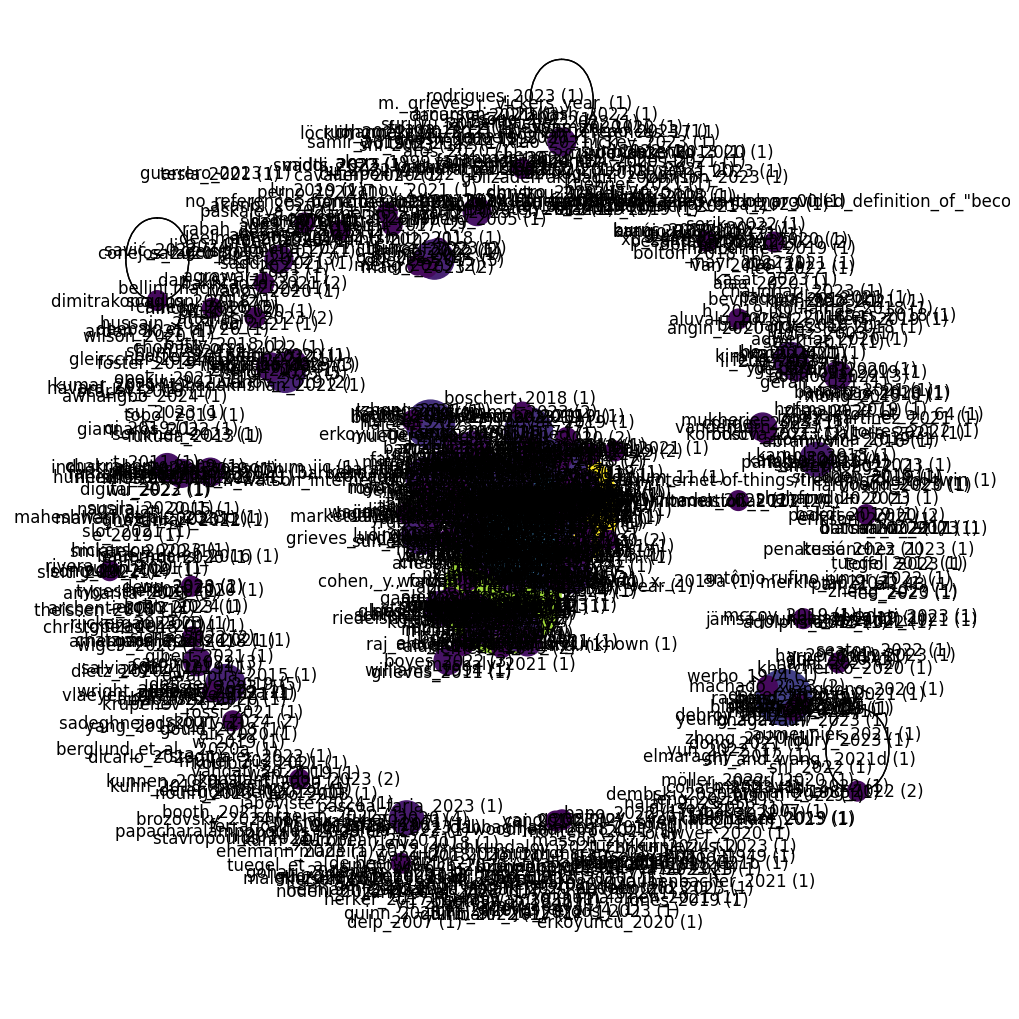

In [141]:
# Calculate degree of each node
degree = dict(G.degree())

# Filter nodes with degree > 0
filtered_nodes = [node for node, deg in degree.items() if deg > 0]

# Create subgraph with filtered nodes
H = G.subgraph(filtered_nodes)

# Calculate degree for subgraph H
degree_H = dict(H.degree())

plt.figure(figsize=(10,10))

# Draw the graph
pos = nx.spring_layout(H)  # positions for all nodes
smallest_degree = np.min(list(degree_H.values()))* 200
nx.draw(H, pos, 
    with_labels=False, 
    node_color=list(degree_H.values()), 
    node_size=[v * 200 - smallest_degree for v in degree_H.values()], 
    cmap=plt.cm.viridis)

# Draw edges
nx.draw_networkx_edges(H, pos)

# Create a dictionary of labels
labels = {node: '{} ({})'.format(node, degree_H[node]) for node in H.nodes()}

# Draw labels
nx.draw_networkx_labels(H, pos, labels=labels)

plt.show()


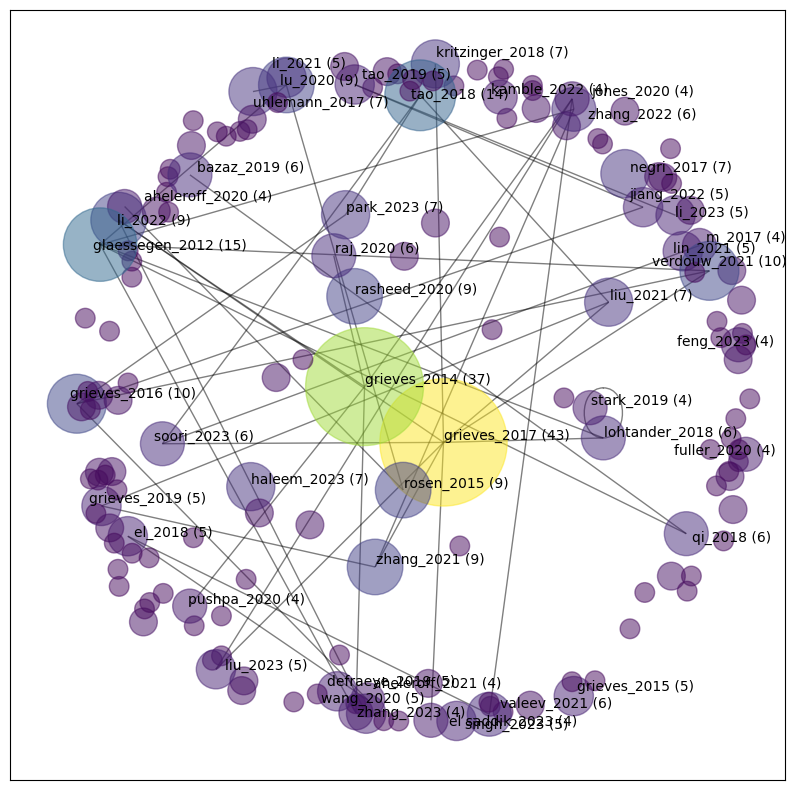

In [154]:
from adjustText import adjust_text
plt.figure(figsize=(10,10))

# Use spring layout with increased spacing
pos = nx.spring_layout(H, k=1.0)  # increase the value of k to increase spacing
smallest_degree = np.min(list(degree_H.values()))* 200

# Draw the graph
nx.draw_networkx_nodes(H, pos, 
    
    node_color=list(degree_H.values()), 
    node_size=[v * 200 - smallest_degree for v in degree_H.values()], 
    cmap=plt.cm.viridis, alpha=0.5)

# Create a dictionary of labels
labels = {node: '{} ({})'.format(node, degree_H[node]) for node in H.nodes()}

# Create a list to store the text objects
texts = []

for node, (x, y) in pos.items():
    if len(H[node].keys()) > 3:
        text = plt.text(x, y, 
                    '{} ({})'.format(node, degree_H[node]), 
                    fontsize=10)
    else:
        text = plt.text(x, y, 
                    '', 
                    fontsize=10)
    texts.append(text)

# Adjust text positions
adjust_text(texts)

# Draw edges only when the node degree is > 3
for node1, node2 in H.edges():
    if degree_H[node1] > 3 and degree_H[node2] > 3:
        nx.draw_networkx_edges(H, pos, edgelist=[(node1, node2)], alpha=0.5)

plt.show()


301 1


/Users/mahmoudouf/Documents/Github/ditital-twin-definition-paper/.venv/lib/python3.9/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


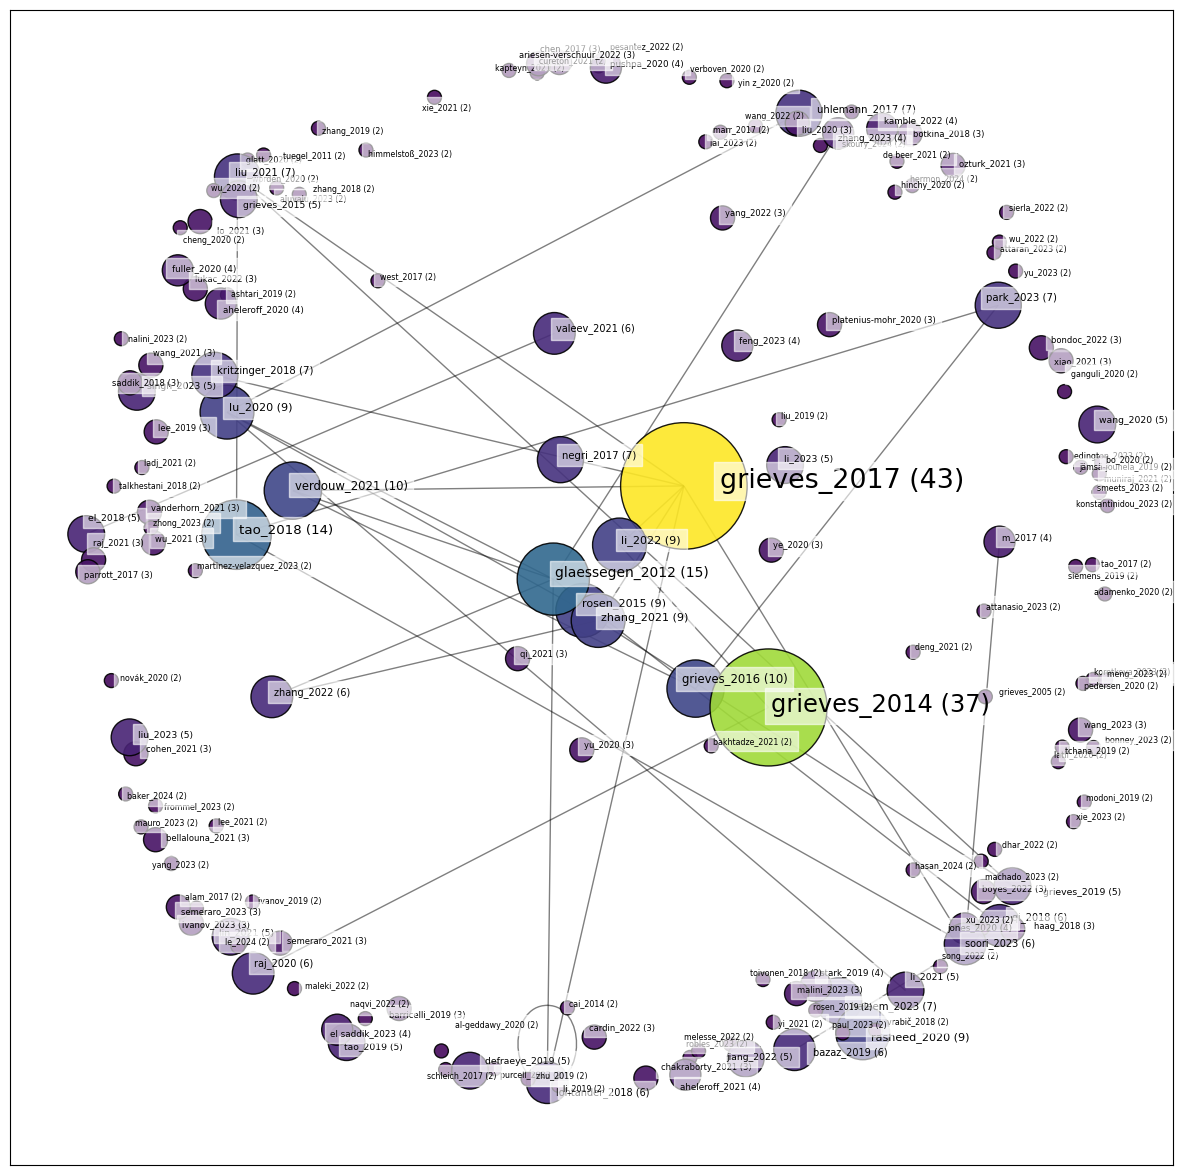

<Figure size 3000x2000 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

In [212]:
from adjustText import adjust_text
plt.figure(figsize=(15,15))

# Use spring layout with increased spacing
pos = nx.spring_layout(H, k=0.9, seed=1000)  # increase the value of k to increase spacing

smallest_degree = 1 * 300 +1
print(smallest_degree, np.min(list(degree_H.values())))

# Draw the nodes only
nx.draw_networkx_nodes(H, pos, 
    node_color=list(degree_H.values()), 
    node_size=[v * 200 - smallest_degree +2 for v in degree_H.values()], 
    cmap=plt.cm.viridis, 
    alpha=0.9,
    edgecolors="black")

# Create a dictionary of labels
labels = {node: '{} ({})'.format(node, degree_H[node]) for node in H.nodes()}

# Create a list to store the text objects
texts = []

for node, (x, y) in pos.items():
    if len(H[node].keys()) > 1:
        text = plt.text(x, y, 
                    '{} ({})'.format(node, degree_H[node]), 
                    fontsize=float(degree_H[node])/3.0+5,
                    bbox=dict(facecolor='white', alpha=0.6, edgecolor='white')
                    )
    else:
        text = plt.text(x, y, 
                    '', 
                    fontsize=10)
    texts.append(text)

# Draw edges only when the node degree is > 3
for node1, node2 in H.edges():
    if degree_H[node1] > 3 and degree_H[node2] > 5:
        nx.draw_networkx_edges(H, pos, edgelist=[(node1, node2)], alpha=0.5)

# Adjust text positions
adjust_text(texts, avoid_self=True, expand_text=(6.0, 6.0), expand_points=(5., 5.), force_explode=(0.5, 0.5), min_arrow_len=2.0)

plt.show()
plt.figure(figsize=(30,20))


In [187]:
import random
d = df2[df2["citation_formatted_shortened"] == "grieves_2016"]
d.loc[random.choice(d.index)]["defs"]


'digital twin is a digital simulator or digital replica of a real IEEE 1451 smart sensor\\u201d [24]'

In [171]:
import pandas as pd
# Assuming sorted_degree is a list of tuples where the first element of each tuple is the node and the second element is the degree
sorted_degree = sorted(degree.items(), key=lambda x: x[1], reverse=True)

# Convert to DataFrame
df_sorted_degree = pd.DataFrame(sorted_degree, columns=['Node', 'Degree'])

# Display the DataFrame
print(df_sorted_degree[:20].to_latex())



\begin{tabular}{llr}
\toprule
 & Node & Degree \\
\midrule
0 & grieves_2017 & 43 \\
1 & grieves_2014 & 37 \\
2 & glaessegen_2012 & 15 \\
3 & tao_2018 & 14 \\
4 & grieves_2016 & 10 \\
5 & verdouw_2021 & 10 \\
6 & li_2022 & 9 \\
7 & lu_2020 & 9 \\
8 & rasheed_2020 & 9 \\
9 & rosen_2015 & 9 \\
10 & zhang_2021 & 9 \\
11 & haleem_2023 & 7 \\
12 & negri_2017 & 7 \\
13 & liu_2021 & 7 \\
14 & uhlemann_2017 & 7 \\
15 & kritzinger_2018 & 7 \\
16 & park_2023 & 7 \\
17 & lohtander_2018 & 6 \\
18 & raj_2020 & 6 \\
19 & qi_2018 & 6 \\
\bottomrule
\end{tabular}

